# Best Model to optimize Gold Recovery Production

The goal of this project is to prepare a prototype of a machine learning model to help to optimize production and eliminate unprofitable parameters gold concentration recovery from gold ore for gold mining company, Zyfra. The data analysis and machine learning will be performed with existing data on extraction and purification. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Best-Model-to-optimize-Gold-Recovery-Production" data-toc-modified-id="Best-Model-to-optimize-Gold-Recovery-Production-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Best Model to optimize Gold Recovery Production</a></span><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Gold-Recovery-Simulation/Calculation" data-toc-modified-id="Gold-Recovery-Simulation/Calculation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Gold Recovery Simulation/Calculation</a></span></li><li><span><a href="#Preprocessing-Data" data-toc-modified-id="Preprocessing-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Preprocessing Data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Metals-Purification-Stage-and-Concentration" data-toc-modified-id="Metals-Purification-Stage-and-Concentration-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Metals Purification Stage and Concentration</a></span></li><li><span><a href="#Eliminate-Abnormalities-on-Metal-Purification-Distribution" data-toc-modified-id="Eliminate-Abnormalities-on-Metal-Purification-Distribution-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Eliminate Abnormalities on Metal Purification Distribution</a></span></li><li><span><a href="#Feed-Particle-Size-Distributions" data-toc-modified-id="Feed-Particle-Size-Distributions-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Feed Particle Size Distributions</a></span></li></ul></li><li><span><a href="#Choosing-the-Best-Model-with-sMAPE" data-toc-modified-id="Choosing-the-Best-Model-with-sMAPE-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Choosing the Best Model with sMAPE</a></span><ul class="toc-item"><li><span><a href="#Features-and-Target-for-Train-and-Test-set" data-toc-modified-id="Features-and-Target-for-Train-and-Test-set-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Features and Target for Train and Test set</a></span></li><li><span><a href="#Data-scaling" data-toc-modified-id="Data-scaling-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Data scaling</a></span></li><li><span><a href="#Models-evaluation-by-sMAPE-score" data-toc-modified-id="Models-evaluation-by-sMAPE-score-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Models evaluation by sMAPE score</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-tuning-on-RF" data-toc-modified-id="Hyperparameter-tuning-on-RF-1.6.3.1"><span class="toc-item-num">1.6.3.1&nbsp;&nbsp;</span>Hyperparameter tuning on RF</a></span></li></ul></li><li><span><a href="#Features-selection-to-Eliminate-Unprofitable-Parameters" data-toc-modified-id="Features-selection-to-Eliminate-Unprofitable-Parameters-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>Features selection to Eliminate Unprofitable Parameters</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

**Data description**
- Technological process

    - `Rougher feed` — raw material
    - `Rougher additions (or reagent additions)` — flotation reagents: Xanthate, Sulphate, Depressant
    - `Xanthate` — promoter or flotation activator;
    - `Sulphate` — sodium sulphide for this particular process;
    - `Depressant` — sodium silicate.
    - `Rougher process` — flotation
    - `Rougher tails` — product residues
    - `Float banks` — flotation unit
    - `Cleaner process` — purification
    - `Rougher Au` — rougher gold concentrate
    - `Final Au` — final gold concentrate
- Parameters of stages

    - `air amount` — volume of air
    - `fluid levels`
    - `feed size` — feed particle size
    - `feed rate`
    
    

**Feature naming**

Here's how you name the features:
- `[stage].[parameter_type].[parameter_name]`
- Example: `rougher.input.feed_ag`
- Possible values for [stage]:
    - `rougher` — flotation
    - `primary_cleaner` — primary purification
    - `secondary_cleaner` — secondary purification
    - `final` — final characteristics
- Possible values for [parameter_type]:
    - `input` — raw material parameters
    - `output` — product parameters
    - `state` — parameters characterizing the current state of the stage
    - `calculation` — calculation characteristics

## Initialization

In [1]:
# pip install -U seaborn

In [2]:
#Loading Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from IPython.display import Image
from IPython.core.display import HTML 
import inspect, re
from sklearn.model_selection import cross_val_score,cross_val_predict
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Dataframe for region 0,1,and 2
try:
    train = pd.read_csv('gold_recovery_train.csv')
    test = pd.read_csv('gold_recovery_test.csv')
    full = pd.read_csv('gold_recovery_full.csv')
except:
    train = pd.read_csv('/datasets/gold_recovery_train.csv')
    test = pd.read_csv('/datasets/gold_recovery_test.csv')
    full = pd.read_csv('/datasets/gold_recovery_full.csv')  

## Data Exploration

In [4]:
# Training set
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
# Test set
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
# Full Dataframe
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
# Training set dataframe info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [8]:
# Test set dataframe info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [9]:
# Full dataframe info
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


## Gold Recovery Simulation/Calculation

Recovery calculation
You need to simulate the process of recovering gold from gold ore.
Use the following formula to simulate the recovery process:
![title](https://pictures.s3.yandex.net/resources/Recovery_1576238822_1589899219.jpg)
Recovery = ((C*(F-T))/(F*(C-T)))*100



**where:**
- C — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery) `rougher.output.concentrate_au`
- F — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery) `rougher.input.feed_au`
- T — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery) `rougher.output.tail_au`


To predict the coefficient, you need to find the share of gold in the concentrate and the tails. Note that both final and rougher concentrates matter.

In [10]:
# Recovery Calculation
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']
train['c_recovery'] = (((C*(F-T))/(F*(C-T)))*100).round(6)
train[['c_recovery','rougher.output.recovery']].head()

,c_recovery,rougher.output.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


In [11]:
# MAE between calculated and actual values
recovery_mae = abs(train['rougher.output.recovery'] - train['c_recovery']).sum()/len(train)
print('Mean Absolute Error between calculated and actual values:',recovery_mae)

Mean Absolute Error between calculated and actual values: 2.074619260549184e-07


**Gold Recovery simulation**

The calculation `c_recovery` matched approximately matched the actual data `rougher.output.recovery`. Mean Absolute Error between calculated and actual values is very insignificant which verified the calculation method is done correctly.

## Preprocessing Data

In [12]:
# Convert date column to dtype datetime
train['date']= pd.to_datetime(train['date'])
test['date']= pd.to_datetime(test['date'])
full['date']= pd.to_datetime(full['date'])

In [13]:
# Missing columns on test set.
missing_columns = list(set(train.columns)-set(test.columns))
missing_columns

['primary_cleaner.output.concentrate_ag',
 'rougher.calculation.sulfate_to_au_concentrate',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'secondary_cleaner.output.tail_pb',
 'final.output.concentrate_ag',
 'secondary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'secondary_cleaner.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.concentrate_pb',
 'rougher.output.tail_sol',
 'final.output.tail_pb',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.tail_au',
 'final.output.tail_sol',
 'final.output.tail_ag',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.tail_sol',
 'c_recovery',
 'final.output.concentrate_pb',
 'primary_cleaner.output.concentrate_pb',
 'fi

In [14]:
# Merge missing final and rougher output recovery from full to test set by date.
test2 = test.merge(full[['date', 'final.output.recovery', 'rougher.output.recovery']], on='date',how='left')

In [15]:
# Missing values % in training set
train.isna().sum().sort_values(ascending=False)/len(train)

rougher.output.recovery                               0.152610
c_recovery                                            0.135409
rougher.output.tail_ag                                0.133452
rougher.output.tail_au                                0.133393
rougher.output.tail_sol                               0.133393
                                                        ...   
primary_cleaner.state.floatbank8_d_level              0.001601
rougher.calculation.sulfate_to_au_concentrate         0.001601
rougher.calculation.floatbank11_sulfate_to_au_feed    0.001601
primary_cleaner.input.feed_size                       0.000000
date                                                  0.000000
Length: 88, dtype: float64

In [16]:
# Missing values % in test set
test2.isna().sum().sort_values(ascending=False)/len(test2)

rougher.output.recovery                       0.093238
final.output.recovery                         0.075478
rougher.input.floatbank11_xanthate            0.060280
primary_cleaner.input.sulfate                 0.051571
primary_cleaner.input.depressant              0.048497
rougher.input.floatbank10_sulfate             0.043887
primary_cleaner.input.xanthate                0.028347
rougher.input.floatbank10_xanthate            0.021004
rougher.input.feed_sol                        0.011441
rougher.input.floatbank11_sulfate             0.009392
rougher.input.feed_rate                       0.006831
secondary_cleaner.state.floatbank3_a_air      0.005806
secondary_cleaner.state.floatbank2_b_air      0.003928
rougher.input.feed_size                       0.003757
secondary_cleaner.state.floatbank2_a_air      0.003415
rougher.state.floatbank10_f_air               0.002903
rougher.state.floatbank10_e_air               0.002903
rougher.state.floatbank10_b_air               0.002903
rougher.st

In [17]:
# Fill missing values
train = train.fillna(method='ffill')
test2 = test2.fillna(method='ffill')

In [18]:
# Reverify missing and duplicates value
print(train.isna().any().sum())
print(test2.isna().any().sum())
print(train.duplicated().sum())
print(test2.duplicated().sum())

0
0
0
0


In [19]:
# Test and train set shape
print(test2.shape)
print(train.shape)

(5856, 55)
(16860, 88)


**Preprocessing Data** 


Date column on train, test, and full set were converted to datetime dtype. There are some missing values on both training and test set data set, ranging from 0.1% to 15% on training set and 0.2% to 9% on test set. The missing values were not significant and were filled by the front fill and back fill method. Both train and test set were then reverified again for missing values and duplicated values. 

The train set has 16860 rows and 87 columns, and test set has only 5856 rows and 55 columns. 32 of those missing columns on the test set will have to be dropped on the train set during the model training. 

## EDA

### Metals Purification Stage and Concentration

In [20]:
# Filtered Dataset by various metals
silver_concentration = train.filter(regex='output').filter(regex='concentrate').filter(regex='ag').columns.tolist()
gold_concentration = train.filter(regex='output').filter(regex='concentrate').filter(regex='au').columns.tolist()
lead_concentration = train.filter(regex='output').filter(regex='concentrate').filter(regex='pb').columns.tolist()

In [21]:
# Retrieve variable as string
def retrieve_name(var):
        """
        Gets the name of var. Does it from the out most frame inner-wards.
        :param var: variable to get name from.
        :return: string
        """
        for fi in reversed(inspect.stack()):
            names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
            if len(names) > 0:
                return names[0]

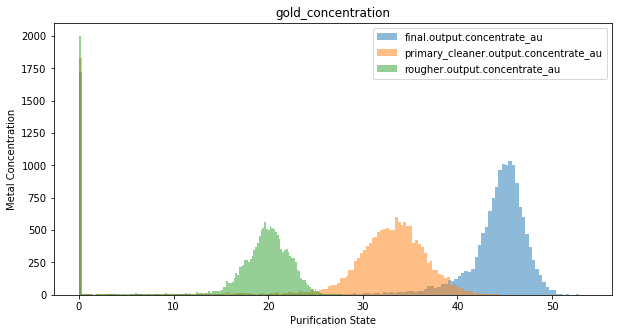

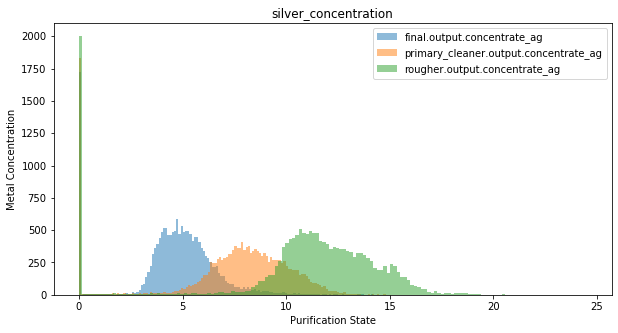

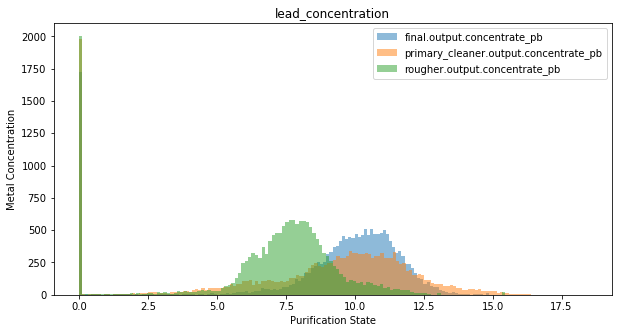

In [22]:
# Purification stage vs metal concentration
agaupb = [gold_concentration,silver_concentration,lead_concentration]
for i,j in enumerate(agaupb):
    def plothistogram(x):
        plt.figure(figsize=(10,5))
        for list in x:
            plt.hist(train[list], bins=150, alpha=.5)
            plt.legend(x)
            plt.xlabel('Purification State')
            plt.ylabel('Metal Concentration')
            plt.title(retrieve_name(j))
    plothistogram(j)

### Eliminate Abnormalities on Metal Purification Distribution

In [23]:
# Eliminate outliers near zero for metal purification Distribution
for k in agaupb:
    def ridzero(x):
        train[(train[x]<0.05)]=np.nan
    ridzero(k)
train = train.dropna(how='any',axis=0)
train.isna().any().sum()

0

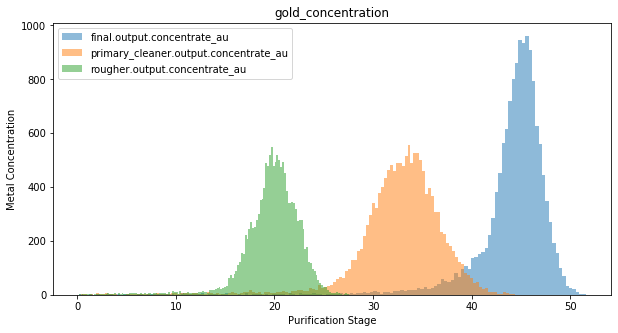

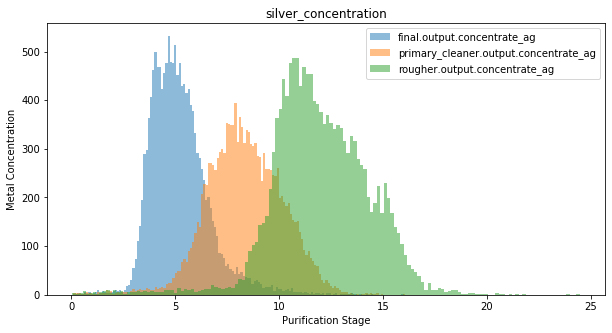

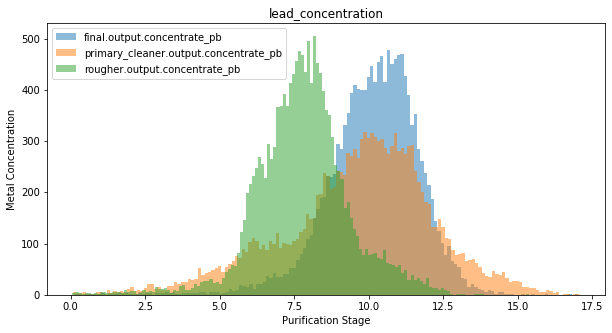

In [24]:
# Replot
for i,j in enumerate(agaupb):
    def plothistogram(x):
        plt.figure(figsize=(10,5))
        for list in x:
            plt.hist(train[list], bins=150, alpha=.5)
            plt.legend(x)
            plt.xlabel('Purification Stage')
            plt.ylabel('Metal Concentration')
            plt.title(retrieve_name(j))
    plothistogram(j)

**Metal Purification Stage and Concentration** 

  
Original plot on Metal Purification Stage and Concentration showed outliers near zero on all three metals. Those outliers were removed by eliminating output lower than 0.05. Data on three different metals were used to compare the output on varipus purification state. Plot was processed in order of gold (Au), silver (Ag), and lead (Pb). Gold produced about twice as much concentration output on the final purification stage compared to primary and rougher output. Silver and lead output decreased after primary purification stage, but final output went back to same level as the output produced during the rougher purification stage. 

### Feed Particle Size Distributions

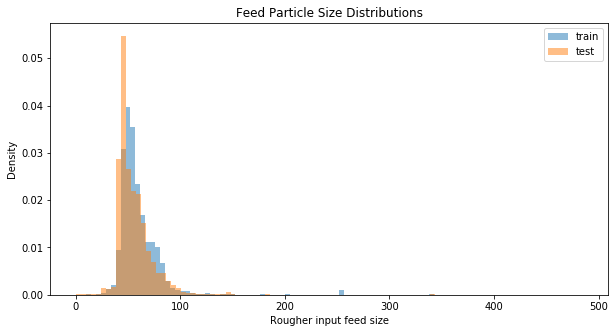

In [25]:
# Feed Particle Size Distributions
plt.figure(figsize=(10,5))
plt.hist(train['rougher.input.feed_size'], bins=100, alpha=.5,density=True,label='train')
plt.hist(test['rougher.input.feed_size'], bins=100, alpha=.5,density=True,label='test')
plt.legend()
plt.xlabel('Rougher input feed size')
plt.ylabel('Density')
plt.title('Feed Particle Size Distributions');

**Feed Particle Size Distributions** 

  
The distribution of feed particle size on train and test set are similar, the model evaluation will be able to proceed correctly. The `density` parameters are turn on to scale up the sample size of the test set due to having a smaller sample size compared to train set. 

## Choosing the Best Model with sMAPE

### Features and Target for Train and Test set

sMAPE, symmetric Mean Absolute Percentage Error is similar to MAE, but is expressed in relative values instead of absolute ones. sMAPE equally takes into account the scale of both the target and the prediction.

We need to predict two values:
- rougher concentrate recovery `rougher.output.recovery`
- final concentrate recovery `final.output.recovery`

In [26]:
# Creating train/test features, and target
train_f = train.drop(['rougher.output.recovery','final.output.recovery','date'],axis=1)
train_t = train[['rougher.output.recovery','final.output.recovery']]
test_f = test2.drop(['rougher.output.recovery','final.output.recovery','date'],axis=1)
test_t = test2[['rougher.output.recovery','final.output.recovery']]
train_f.shape

(14343, 85)

In [27]:
# Drop all columns on train set that are not in test set
comcol = test_f.columns.tolist()
train_f = train_f[comcol]

### Data scaling

In [28]:
# Scale data
scaler = StandardScaler()
scaler.fit(train[comcol])
train_f[comcol] = scaler.transform(train_f[comcol])
test_f[comcol] = scaler.transform(test_f[comcol])
train_f.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.163880,0.357443,-0.109594,0.282356,-0.435472,-0.297452,-0.418877,-0.800474,-0.424602,-0.270206,...,-1.042873,-0.463636,-0.634938,-0.754694,-1.155985,-0.375338,-0.858975,-0.424295,-0.933382,-2.625279
1,-0.200172,0.406489,-0.109594,0.318781,-0.231367,-0.353760,-0.233058,-0.316624,-0.231045,-0.288699,...,-1.047216,-0.522729,-0.663410,-0.696600,-1.136501,-0.424087,-0.875556,-0.427147,-0.960017,-2.464604
2,-0.245066,0.704353,-0.109594,0.288923,-0.035008,-0.328127,-0.047848,-0.338329,-0.038309,-0.333041,...,-1.043195,-0.464280,-0.670604,-0.693198,-1.131070,-0.423016,-0.870468,-0.425490,-0.954740,-2.508129
3,-0.283513,0.706065,-0.109594,0.303261,-0.047285,-0.355082,-0.045782,-0.311100,-0.050902,-0.328990,...,-1.039393,-0.431677,-0.654068,-0.694233,-1.148314,-0.398704,-0.876854,-0.418780,-0.958764,-2.470149
4,-0.389753,0.878784,-0.109594,0.337660,-0.036682,-0.299241,-0.039881,-0.330005,-0.056254,-0.333557,...,-1.041022,-0.411713,-0.662926,-0.691834,-1.155972,-0.463844,-0.891368,-0.421347,-0.960314,-2.509969


### Models evaluation by sMAPE score

Here’s how sMAPE is calculated:
![title](https://pictures.s3.yandex.net/resources/smape_1576238825_1589899257.jpg)

The final metric includes the two values:
![title](https://pictures.s3.yandex.net/resources/_smape_1589899561.jpg)

In [29]:
# Function to calculate sMAPE
def smape(y_target, y_predict):
    return np.average(np.abs(y_target-y_predict)/((np.abs(y_target)+np.abs(y_predict))/2))

# Function to calculate final sMAPE
def smape_final(y_target,y_predict):
    smape_rougher = smape(y_target.iloc[:,0], y_predict[:,0])
    smape_final = smape(y_target.iloc[:,1], y_predict[:,1])
    return 0.25*smape_rougher + 0.75*smape_final

# Cross validated final sMAPE
def cv_model(model, y_features, y_target, cv):
    scorer = make_scorer(smape_final)
    scores = cross_val_score(model, y_features, y_target, cv=cv, n_jobs=-1,scoring=scorer)
    return np.average(scores)

In [30]:
# Various Model
LR = LinearRegression()
DT = DecisionTreeRegressor(random_state=12345)
RF = RandomForestRegressor(random_state=12345,n_jobs=-1)
base = DummyRegressor(strategy='mean')

In [31]:
# Applying different model with cross_validation
LR_smape_finalscore = cv_model(LR,train_f,train_t,cv=5)
DT_smape_finalscore = cv_model(DT,train_f,train_t,cv=5)
base_smape_finalscore = cv_model(base,train_f,train_t,cv=5)
RF_smape_finalscore = cv_model(RF,train_f,train_t,cv=5)

In [32]:
# Model's final sMAPE dataframe
modelplot = pd.DataFrame({
    'Model': ['LR','DT','RF','Base'],
    'Final sMAPE': [LR_smape_finalscore, DT_smape_finalscore, RF_smape_finalscore, base_smape_finalscore]})
modelplot.sort_values(by='Final sMAPE')

,Model,Final sMAPE
2,RF,0.097736
3,Base,0.101694
0,LR,0.105455
1,DT,0.145731


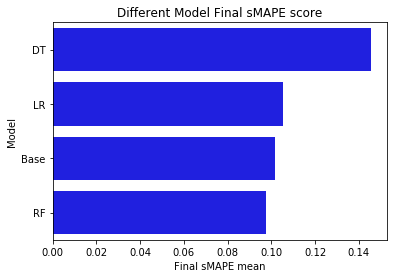

In [33]:
# Final sMAPE with various Model
sns.barplot(data=modelplot.sort_values(by='Final sMAPE',ascending=False),x='Final sMAPE', y = 'Model',color='b')
plt.title('Different Model Final sMAPE score')
plt.xlabel('Final sMAPE mean')
plt.ylabel('Model');

**Models evaluation by sMAPE score** 

  
Model evaluations were performed with four different: `DecisionTreeRegressor`, `LinearRegression`,`DummyRegressor.mean`, and `RandomForestRegressor`. Out of all the model evaluation, `RandomForestRegressor` seems to have the lowest symmetrical mean absolute error of 9.77%, followed by `DummyRegressor.mean`. `DecisionTreeRegressor` showed produced te highest sMAPE at 14.57%.

#### Hyperparameter tuning on RF

In [34]:
%%time
# Hyperparameter tuning on RF
bestrf = pd.DataFrame(columns=['i','n','smape'])
for i in range (1,10):
    for n in range (1,100,5):
        RF_hyper = RandomForestRegressor(max_depth=i,n_estimators=n,
                                      random_state=12345,
                                      n_jobs=-1,
                                      max_features=18).fit(train_f,train_t) #max_features=n_features/3
        test_smape = cv_model(RF_hyper,train_f,train_t,cv=5)
        bestrf=bestrf.append({'i': i,
                       'n': n,
                       'smape': test_smape}, ignore_index=True)
print(f"Best tree depth and n_estimators :{bestrf['i'][bestrf.smape.idxmin()]},{bestrf['n'][bestrf.smape.idxmin()]}; with the lowest sMAPE score of {bestrf.smape.min()}")

Best tree depth and n_estimators :4.0,56.0; with the lowest sMAPE score of 0.0886070867888067
Wall time: 6min 10s


In [35]:
# Hyperparameter Tuned RF on Test set
RF_test = RandomForestRegressor(max_depth=4,n_estimators=56,
                              random_state=12345,
                              n_jobs=-1,
                              max_features=18).fit(train_f,train_t)
smape_final_test = smape_final(test_t,RF_test.predict(test_f))
print('Final sMAPE score on test set using Hyperparameter Tuned RF:',smape_final_test)

Final sMAPE score on test set using Hyperparameter Tuned RF: 0.1080534199193687


**Choosing the Best Model with sMAPE** 

  
With the model RandomForestRegressor producing the lowest sMAPE, RandomForestRegressor is chosen to be the best model for this analysis. Test set was then evaluated using RandomForestRegressor model fitting with train set. RandomForestRegressor on test set seems to produce much higher sMAPE of 12.73% compared to train set at 9.77%. 

RandomForestRegressor model was hyperparameter tuned to improve the sMAPE score. With parameters `max_depth=4`, `n_estimators=56`, `max_features=18`, the RandomForestRegressor model was able to achieve lower score at 8.86%.

### Features selection to Eliminate Unprofitable Parameters 

In [36]:
RF_test.fit(train_f, train_t)
s = pd.DataFrame()
s['Feature'] = train_f.columns.values
s["Importances"] = pd.Series(RF_test.feature_importances_)
s.sort_values(by='Importances', ascending=False).round(5)

,Feature,Importances
12,rougher.input.feed_ag,0.19867
0,primary_cleaner.input.sulfate,0.17316
44,secondary_cleaner.state.floatbank4_b_air,0.07106
42,secondary_cleaner.state.floatbank4_a_air,0.06346
17,rougher.input.feed_au,0.05293
16,rougher.input.feed_sol,0.03776
28,rougher.state.floatbank10_d_air,0.03767
19,rougher.input.floatbank10_xanthate,0.03653
34,secondary_cleaner.state.floatbank2_a_air,0.02968
22,rougher.state.floatbank10_a_air,0.02631


**Features Selection**

Features `rougher.input.feed_ag` showing the highest importance feature in RandomForestRegressor model. 

In [37]:
# Drop features's importances lower than 0.01
selected = s.loc[abs(s["Importances"]) > 0.01 , 'Feature']

In [38]:
# Correlation on train set
train_f2 = train_f[selected]
test_f2 = test_f[selected]
print(test_f.shape[1])
print(test_f2.shape[1])

52
20


In [39]:
%%time
# Hyperparameter tuning on RF
bestrf = pd.DataFrame(columns=['i','n','smape'])
for i in range (1,10):
    for n in range (1,100,5):
        RF_hyper = RandomForestRegressor(max_depth=i,n_estimators=n,random_state=12345,n_jobs=-1,
                                      max_features=7).fit(train_f2,train_t) #max_features=n_features/3
        test_smape = cv_model(RF_hyper,train_f2,train_t,cv=5)
        bestrf=bestrf.append({'i': i,
                       'n': n,
                       'smape': test_smape}, ignore_index=True)
print(f"Best tree depth and n_estimators :{bestrf['i'][bestrf.smape.idxmin()]},{bestrf['n'][bestrf.smape.idxmin()]}; with the lowest sMAPE score of {bestrf.smape.min()}")

Best tree depth and n_estimators :4.0,11.0; with the lowest sMAPE score of 0.08751303091685445
Wall time: 3min 20s


In [40]:
# Selected features Test set on hyperparameter tuned RF.
RF_test2 = RandomForestRegressor(max_depth=4,n_estimators=11,
                              random_state=12345,
                              n_jobs=-1,
                              max_features=7).fit(train_f2,train_t)
smape_final_test2 = smape_final(test_t,RF_test2.predict(test_f2))
print('Final sMAPE score on test set using Hyperparameter Tuned RF:',smape_final_test2)

Final sMAPE score on test set using Hyperparameter Tuned RF: 0.10593223621204992


In [41]:
# Sanity Check
base.fit(train_f, train_t)
test_p = base.predict(test_f)
smape_base = smape_final(test_t, test_p).mean()
print(f'Sanity check with dummyregressor, sMAPE score on original test set: {smape_base}')

Sanity check with dummyregressor, sMAPE score on original test set: 0.12335466980468278


In [42]:
print('Improvement from base model to hyperparamter tuned and features selected test set:',
      ((smape_base-smape_final_test2)/smape_base*100).round(2),'%')

Improvement from base model to hyperparamter tuned and features selected test set: 14.12 %


## Conclusion

**Summary:**

- Date column on train, test, and full set were converted to datetime dtype and There are some missing values on both training and test set data set, the missing values were not significant and were filled by the front fill and back fill method. 

  

- The train set has 16860 rows, and test set has only 5856 rows due to full data set being split at the ratio 75:25. Some of the features that are present in the training set may be absent from the test set because they were measured and/or calculated much later. 32 of those missing columns on the test set will have to be dropped on the train set during the model training.  

  

  

- First plot on Metal Purification Stage and Concentration showed outliers near zero on all three metals. Those outliers were removed by eliminating output lower than 0.05. Data on three different metals were used to compare the output on various purification state. Gold produced about twice as much concentration output on the final purification stage compared to primary and rougher output. Silver and lead output decreased after primary purification stage, but final output went back to same level as the output produced during the rougher purification stage.  

  

   

- The distribution of feed particle size on train and test were verified by plotting both of their distribution. Distribution sets are similar, the model evaluation will be able to proceed correctly. 

  

   

- Model evaluations were performed with four different models: `DecisionTreeRegressor`, `LinearRegression`,`DummyRegressor.mean`, and `RandomForestRegressor`. `RandomForestRegressor` seems to have the lowest symmetrical mean absolute error of 9.77%, followed by `DummyRegressor.mean`. `DecisionTreeRegressor` produced the highest sMAPE at 14.57%. 

  
  

- With the model RandomForestRegressor producing the lowest sMAPE, RandomForestRegressor is chosen to be the best model for this analysis. Test set was then evaluated using RandomForestRegressor model fitting with train set. RandomForestRegressor model was hyperparameter tuned to improve the sMAPE score. With parameters `max_depth=4`, `n_estimators=56`, `max_features=18`, the RandomForestRegressor model was able to achieve lower score at 8.86%.
  

- Features selection processed was performed by using the RandomForestRegressor `feature_importances_` to eliminate the unporfitable parameters. Features `rougher.input.feed_ag` showing the highest importance feature in RandomForestRegressor model. This process was performed by eliminating the importances between features of the train set that is lower than 0.01. After features are selected,  `RandomForestRegressor` Hyperparameter tunings was use on new train set with features selected before evaluate on the test set.


- Tuning produced hyperparameters of `max_depth=4`, `n_estimators=11`, `max_features=7`, new test set with selected features was then evaluate with this hyperparameters. Final sMAPE score of 10.59% on test set produced using Hyperparameter Tuned RandomForestRegressor.

**Final Conclusion:**

The best model to optimze production on Gold Recovery for Zyfra will be Hyperparameter tuned `RandomForestRegressor` with parameters of `max_depth=4`, `n_estimators=11`, `max_features=n_features/3`, with features selected using `feature_importances_` from `RandomForestRegressor` to eliminate the unporfitable features. This Hyperparameter tuned `RandomForestRegressor` model achieved approximately **14.12%** improvement on sMAPE score compared to base model via DummyRegressor.mean.